In [1]:
!pip install pycaret

  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached jinja2-3.1.5-py3-none-any.whl.metadata (2.6 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pyod-2.0.3.tar.gz (169 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached category_encoders-2.8.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached importlib_me

In [ ]:
from pycaret.regression import *


ValueError: _CURRENT_EXPERIMENT global variable is not set. Please run setup() first.

In [17]:
from pycaret.regression import RegressionExperiment
import pandas as pd
first = pd.read_csv(r'C:\Users\ASUS\Desktop\projectforecastpm2_5\dataforecast\raw_data\export-jsps001-1h.csv')
data = pd.read_csv(r'C:\Users\ASUS\Desktop\projectforecastpm2_5\dataforecast\cleandata_vtest_hours.csv')
data



,timestamp,humidity,pm_2_5,temperature,pm_2_5_Lag1,pm_2_5_Lag2,pm_2_5_Lag3,pm_2_5_Lag4,pm_2_5_Lag5,pm_2_5_Lag6,pm_2_5_Lag7
0,2021-08-15 14:00:00,75.818644,20.084746,29.238136,20.285714,43.163793,55.907563,34.826923,19.655172,25.800000,29.242424
1,2021-08-15 15:00:00,74.075424,22.758621,29.374576,20.084746,20.285714,43.163793,55.907563,34.826923,19.655172,25.800000
2,2021-08-15 16:00:00,79.509167,18.478261,28.073333,22.758621,20.084746,20.285714,43.163793,55.907563,34.826923,19.655172
3,2021-08-15 17:00:00,90.900000,8.225000,25.560000,18.478261,22.758621,20.084746,20.285714,43.163793,55.907563,34.826923
4,2021-08-15 18:00:00,90.565833,6.193277,25.547500,8.225000,18.478261,22.758621,20.084746,20.285714,43.163793,55.907563
...,...,...,...,...,...,...,...,...,...,...,...
27537,2025-02-11 08:00:00,87.340026,43.263158,23.013561,42.558333,37.806723,34.691667,35.283333,38.275000,36.193277,34.616667
27538,2025-02-11 09:00:00,80.816273,42.478992,25.590026,43.263158,42.558333,37.806723,34.691667,35.283333,38.275000,36.193277
27539,2025-02-11 10:00:00,67.041454,40.848214,29.023077,42.478992,43.263158,42.558333,37.806723,34.691667,35.283333,38.275000
27540,2025-02-11 11:00:00,53.353909,31.842105,32.314087,40.848214,42.478992,43.263158,42.558333,37.806723,34.691667,35.283333


In [18]:
s = RegressionExperiment()
s.setup(data, target = 'pm_2_5', session_id = 123)



,Description,Value
0,Session id,123
1,Target,pm_2_5
2,Target type,Regression
3,Original data shape,"(27542, 11)"
4,Transformed data shape,"(27542, 11)"
5,Transformed train set shape,"(19279, 11)"
6,Transformed test set shape,"(8263, 11)"
7,Numeric features,9
8,Categorical features,1
9,Preprocess,True


In [19]:
best = s.compare_models()




,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:21:34
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,3.9388,37.3344,6.0983,0.8319,0.3189,0.5123,0.0370
knn,K Neighbors Regressor,4.2960,39.7170,6.2970,0.8212,0.3484,0.4445,0.0660
huber,Huber Regressor,5.2928,50.5834,7.1067,0.7723,0.4524,0.9846,0.1070
en,Elastic Net,7.2201,84.3645,9.1829,0.6202,0.5748,2.0645,0.0390
par,Passive Aggressive Regressor,6.9809,85.3119,9.1547,0.6166,0.5299,1.2125,0.0440
llar,Lasso Least Angle Regression,10.2031,162.1893,12.7343,0.2696,0.7176,3.0613,0.0390
lasso,Lasso Regression,10.2067,162.3015,12.7387,0.2691,0.7178,3.0625,0.2490
et,Extra Trees Regressor,11.9329,218.6794,14.7870,0.0151,0.7926,3.5566,0.6090
lightgbm,Light Gradient Boosting Machine,11.9820,222.0708,14.9012,-0.0001,0.7960,3.6220,0.1260
gbr,Gradient Boosting Regressor,11.9854,222.1773,14.9047,-0.0006,0.7964,3.6267,0.6760


In [21]:
train_results = s.pull()
train_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,3.9388,37.3344,6.0983,0.8319,0.3189,0.5123,0.037
knn,K Neighbors Regressor,4.2960,39.7170,6.2970,0.8212,0.3484,0.4445,0.066
huber,Huber Regressor,5.2928,50.5834,7.1067,0.7723,0.4524,0.9846,0.107
en,Elastic Net,7.2201,84.3645,9.1829,0.6202,0.5748,2.0645,0.039
par,Passive Aggressive Regressor,6.9809,85.3119,9.1547,0.6166,0.5299,1.2125,0.044
llar,Lasso Least Angle Regression,10.2031,162.1893,12.7343,0.2696,0.7176,3.0613,0.039
lasso,Lasso Regression,10.2067,162.3015,12.7387,0.2691,0.7178,3.0625,0.249
et,Extra Trees Regressor,11.9329,218.6794,14.7870,0.0151,0.7926,3.5566,0.609
lightgbm,Light Gradient Boosting Machine,11.9820,222.0708,14.9012,-0.0001,0.7960,3.6220,0.126
gbr,Gradient Boosting Regressor,11.9854,222.1773,14.9047,-0.0006,0.7964,3.6267,0.676


In [22]:
test_results = s.predict_model(best)
print(test_results)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,3.9438,32.0722,5.6632,0.8596,0.3155,0.5448


                 timestamp   humidity  temperature  pm_2_5_Lag1  pm_2_5_Lag2  \
15474  2023-09-19 11:00:00  72.850983    31.780312    21.266666    41.386555   
7057   2022-09-04 02:00:00  99.320908    26.566000    12.644629    19.630253   
11693  2023-03-16 18:00:00  84.443695    32.080086    31.123966    28.650000   
5017   2022-06-10 03:00:00  99.717659    26.292952     6.403509     5.183333   
22650  2024-07-20 04:00:00  84.738716    28.059420    32.347458    30.220779   
...                    ...        ...          ...          ...          ...   
26625  2025-01-03 15:00:00  62.348629    31.565094    36.708332    35.680672   
1953   2022-02-01 11:00:00  54.771511    31.716167    42.650002    48.000000   
2581   2022-02-27 15:00:00  80.669434    28.021999    23.311476    26.271187   
6103   2022-07-26 01:00:00  99.622963    27.484407    29.916666    27.426229   
23807  2024-09-06 22:00:00  85.477264    26.533739    12.151260     8.433333   

       pm_2_5_Lag3  pm_2_5_Lag4  pm_2_5

In [23]:

tune_model = s.tune_model(best)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.9531,36.2145,6.0179,0.8425,0.3207,0.6609
1,4.0564,39.1697,6.2586,0.8208,0.3478,1.3458
2,3.8660,36.3489,6.0290,0.8399,0.3251,0.6706
3,3.9971,39.8048,6.3091,0.8173,0.3289,0.4299
4,3.9017,38.2038,6.1809,0.8286,0.3169,0.4834
5,3.9308,31.7985,5.6390,0.8582,0.3137,0.4661
6,3.7037,29.8773,5.4660,0.8636,0.3012,0.5374
7,3.8398,32.0524,5.6615,0.8520,0.3113,0.4080
8,3.8054,37.8191,6.1497,0.8248,0.3240,0.5718


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
s.evaluate_model(best)



interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [26]:
predictions = s.predict_model(best)# ทำนายแค่ test set
print("\nผลการทำนายในชุดทดสอบ:")
predictions[['prediction_label', 'pm_2_5']]


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,3.9438,32.0722,5.6632,0.8596,0.3155,0.5448



ผลการทำนายในชุดทดสอบ:


,prediction_label,pm_2_5
15474,21.416487,9.682693
7057,13.586099,8.158334
11693,30.368719,33.394958
5017,7.918020,5.934426
22650,31.479873,40.125000
...,...,...
26625,35.440345,38.200001
1953,40.836469,33.733334
2581,23.273548,21.683332
6103,29.272270,30.338984


In [28]:
new_data = data.copy().drop(['pm_2_5'], axis=1)
# ทำนายค่า PM2.5 ในชุดทดสอบ
predictions = s.predict_model(best,data = new_data)
print("\nผลการทำนายในชุดทดสอบ:")
predictions[['prediction_label']]



ผลการทำนายในชุดทดสอบ:


,prediction_label
0,20.525604
1,20.343086
2,22.771455
3,18.884104
4,9.572267
...,...
27537,40.753218
27538,41.393326
27539,40.681161
27540,39.200115


<Figure size 2000x600 with 0 Axes>

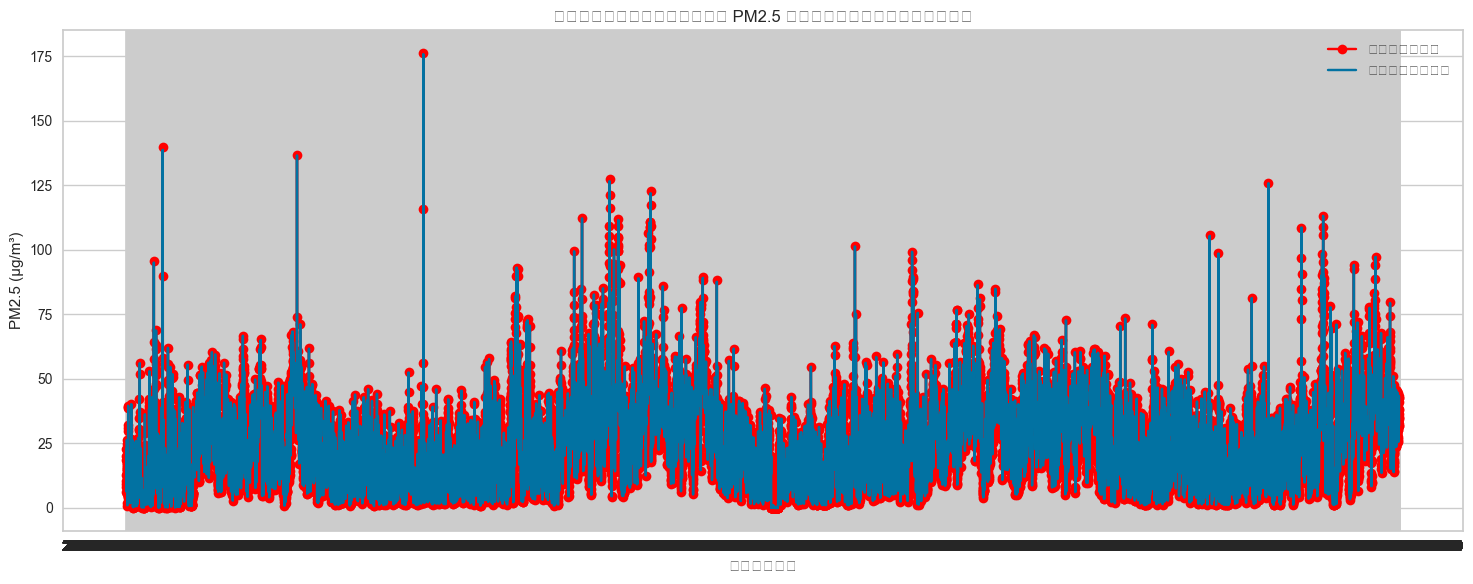

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
sample_rate = 100  # แสดงทุกๆ 10 จุด


plt.figure(figsize=(15, 6))
plt.plot(data['timestamp'], data['pm_2_5'], label='ค่าจริง', marker='o',color = 'red')
plt.plot(data['timestamp'], predictions['prediction_label'], label='ค่าทำนาย', marker='x')
plt.title('เปรียบเทียบค่า PM2.5 จริงกับค่าทำนาย')
plt.xlabel('วันที่')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# data[::100]

In [33]:

train_predictions = s.predict_model(best, data=s.get_config('X_train'))
train_predictions


,timestamp,humidity,temperature,pm_2_5_Lag1,pm_2_5_Lag2,pm_2_5_Lag3,pm_2_5_Lag4,pm_2_5_Lag5,pm_2_5_Lag6,pm_2_5_Lag7,rolling_avg_7,prediction_label
14180,2023-07-27 11:00:00,79.035118,30.451906,13.333333,15.478992,29.983334,34.566666,29.441441,28.109243,24.775000,23.180429,11.421380
19585,2024-03-09 01:00:00,73.278458,28.342733,25.850000,26.366667,30.890757,31.808332,31.094828,28.638655,25.116667,29.246410,30.159597
13091,2023-05-14 00:00:00,100.000000,30.810083,15.566667,12.416667,13.420168,24.008333,31.291666,13.390625,23.666666,18.838448,21.753188
15257,2023-09-10 10:00:00,78.078148,28.511415,11.208333,18.566668,16.109243,14.008333,14.025000,17.784313,14.750000,14.155032,7.473386
20278,2024-04-06 23:00:00,69.874939,30.453722,33.909092,35.730434,33.680672,32.108334,29.299999,25.616667,25.638655,32.151695,34.772872
...,...,...,...,...,...,...,...,...,...,...,...,...
15377,2023-09-15 10:00:00,81.154900,28.304350,25.235294,28.290598,35.875000,34.356522,38.324074,34.400002,33.250000,29.824736,12.420143
21602,2024-06-01 10:00:00,72.141327,29.982399,21.128204,26.985714,24.116667,27.638655,6.643478,9.450000,9.058824,18.126543,11.005937
17730,2023-12-22 11:00:00,67.076378,30.717722,11.150000,10.858334,14.294118,13.575000,12.333333,10.958333,16.537815,11.986064,10.806679
15725,2023-09-29 22:00:00,77.071220,29.018904,38.958332,32.658333,32.092438,27.716667,30.700001,39.991302,41.583332,34.285633,37.960693


In [ ]:
# new_data = data.copy().drop(['pm_2_5'], axis=1)
# predictions = s.predict_model(tune_model, data=new_data)
# predictions
# predictions.to_csv(r"C:\Users\ASUS\Desktop\projectforecastpm2_5\dataforecast\test1hv-1.csv", index=False)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,4.1211,27.8621,5.2785,-1.2610,0.1316,0.1003


,timestamp,humidity,temperature,pm_2_5_Lag1,pm_2_5_Lag2,pm_2_5_Lag3,pm_2_5_Lag4,pm_2_5_Lag5,pm_2_5_Lag6,pm_2_5_Lag7,pm_2_5,prediction_label
11987,2023-03-29 00:00:00,100.0,28.862223,32.386555,33.075001,29.850000,26.216667,19.758333,19.033058,19.949579,41.959595,32.173726
11988,2023-03-29 01:00:00,100.0,28.247000,41.959595,32.386555,33.075001,29.850000,26.216667,19.758333,19.033058,42.900002,40.795550
11989,2023-03-29 02:00:00,100.0,28.085667,42.900002,41.959595,32.386555,33.075001,29.850000,26.216667,19.758333,47.033333,41.642515
11990,2023-03-29 03:00:00,100.0,28.019411,47.033333,42.900002,41.959595,32.386555,33.075001,29.850000,26.216667,37.901962,45.365141
11991,2023-03-29 04:00:00,100.0,27.397833,37.901962,47.033333,42.900002,41.959595,32.386555,33.075001,29.850000,36.174999,37.141101
11992,2023-03-29 05:00:00,100.0,27.281834,36.174999,37.901962,47.033333,42.900002,41.959595,32.386555,33.075001,38.608334,35.585736
11993,2023-03-29 06:00:00,100.0,27.344250,38.608334,36.174999,37.901962,47.033333,42.900002,41.959595,32.386555,37.891666,37.777284


In [ ]:
exp1.save_model(best, 'models/best_model')

,Unnamed: 0,timestamp,timezone,humidity,pm_2_5_sp,temperature,prediction_label
0,0,8/15/2021 7:00,Asia/Bangkok,82.633751,NaN,28.392101,21.897203
1,1,8/16/2021 7:00,Asia/Bangkok,87.845352,NaN,26.644278,19.928666
2,2,8/17/2021 7:00,Asia/Bangkok,90.980721,NaN,26.299335,18.834054
3,3,8/18/2021 7:00,Asia/Bangkok,77.261292,NaN,28.296894,19.332288
4,4,8/19/2021 7:00,Asia/Bangkok,78.807030,NaN,27.969023,18.036331
